### **Importing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### **Load Data**

In [2]:
# loading the data 
df = pd.read_csv('/content/car data.csv')

In [3]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
137,Hero Extreme,2013,0.65,0.787,16000,Petrol,Individual,Manual,0
192,Hero Hunk,2007,0.20,0.750,49000,Petrol,Individual,Manual,1
190,Bajaj Pulsar 150,2008,0.20,0.750,60000,Petrol,Individual,Manual,0
300,brio,2016,5.30,5.900,5464,Petrol,Dealer,Manual,0
129,Yamaha FZ S V 2.0,2017,0.78,0.840,5000,Petrol,Individual,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
77,corolla,2004,1.50,12.350,135154,Petrol,Dealer,Automatic,0
175,Hero Honda CBZ extreme,2011,0.38,0.787,75000,Petrol,Individual,Manual,0
89,etios g,2014,4.75,6.760,40000,Petrol,Dealer,Manual,0
71,corolla altis,2011,4.50,12.480,45000,Diesel,Dealer,Manual,0


### **Data Analysis**

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

### **Data Visualization**

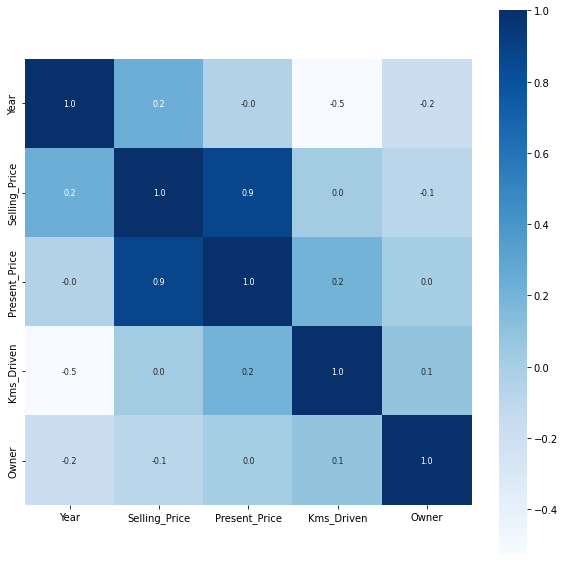

In [8]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

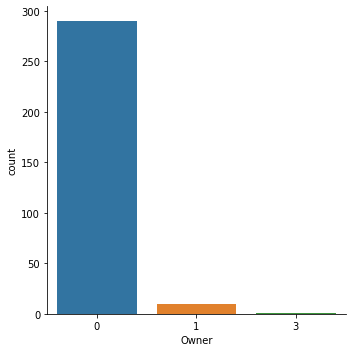

In [9]:
# number of values for each quality
sns.catplot(x='Owner', data = df, kind = 'count')

### **Data Preprocessing**

In [10]:
# checking the distribution of categorical data
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
### encode categorical data
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
265,jazz,2017,6.50,8.70,21200,0,0,0,0
69,corolla altis,2016,14.25,20.91,12000,0,0,0,0
177,Honda Activa 125,2016,0.35,0.57,24000,0,1,1,0
40,baleno,2016,5.85,7.87,24524,0,0,1,0
282,city,2014,8.25,14.00,63000,1,0,0,0


### **Splitting the data and Target**

In [16]:
X = df.drop(columns=['Selling_Price','Car_Name'],axis=1)
y = df['Selling_Price']

In [17]:
print(X.shape ,y.shape)

(301, 7) (301,)


### **Splitting Training and Test data**

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=2)

In [19]:
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(225, 7) (76, 7) (225,) (76,)


### **Build Model1**
Linear Regression

In [20]:
# loading the linear regression model
model = LinearRegression()

In [21]:
model.fit(X_train,Y_train)

LinearRegression()

In [22]:
# prediction on Training data
training_data_prediction = model.predict(X_train)

In [23]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8845175033894128


In [24]:
# prediction on Test data
test_data_prediction = model.predict(X_test)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8340915574385248


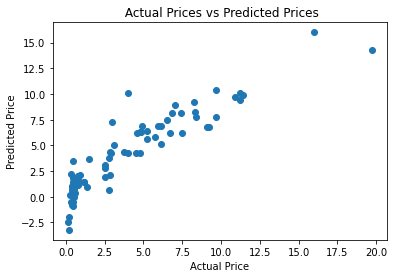

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### **Build Model2**
Lasso Regression

In [27]:
# loading the linear regression model
las_model = Lasso()

In [28]:
las_model.fit(X_train,Y_train)

Lasso()

In [29]:
# prediction on Training data
training_data_prediction = las_model.predict(X_train)

In [30]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427955651055721


In [31]:
# prediction on Test data
test_data_prediction = las_model.predict(X_test)

In [32]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8488713419782646


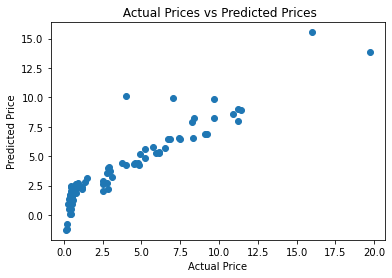

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()